# 제주 가시리 기상관측치 EDA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import math
pd.options.mode.chained_assignment = None

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from preprocess.functions.date_inspector import load_files
from functions.eda import show_correlation, show_normalized_mutual_information, show_relative_density_plot, relative_density_plot

In [56]:
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw', 'kma'))
print(data_dir)

/home/jeon/Desktop/kpx/data/raw/kma


# make data

#### df_per_hour

In [57]:
#df_per_hour
def merge_obs_power_hour(df_obs, df_power) :
    df_obs['datetime'] = pd.to_datetime(df_obs['datetime'])
    df_obs['date'] = pd.to_datetime(df_obs['date'])
    
    df_power['year'] = df_power['datetime'].dt.year
    df_power['month'] = df_power['datetime'].dt.month
    df_power['day'] = df_power['datetime'].dt.day
    df_power['hour'] = df_power['datetime'].dt.hour
    df_power['dayofyear'] = df_power['datetime'].dt.dayofyear
    df_power = df_power.drop(['풍속(m/s)', '풍향(16방위)'], axis=1)
    
    df_merged = pd.merge(df_obs, df_power.drop(['location'], axis=1), how='inner', on=['datetime', 'date'])
    df_merged = df_merged[df_merged['발전량(kW)'].notnull()]
    df_merged = df_merged.drop(['datetime', 'date'], axis=1)
    df_merged['발전량(kW)'] = df_merged['발전량(kW)'].astype('float64')
    df_merged = df_merged.rename(columns={'기온(°C)':'Celsius(°C)',
                           '강수량(mm)':'Rainfall(mm)',
                           '풍속(m/s)':'Wind Speed(m/s)',
                           '풍향(16방위)':'Wind Direction(16)',
                           '습도(%)':'Humidity(%)',
                        '일사(MJ/m2)' : 'Solar Radiation(MJ/m^2)',
                           '적설(cm)':'Snowfall(cm)',
                           '전운량(10분위)':'Cloud',
                            '증기압(hPa)':'Vapor Pressure(hPa)',
                            '해면기압(hPa)':'Sea surface pressure(hPa)',
                            '현지기압(hPa)':'Local Pressure(hPa)',
                            '발전량(kW)':'Power Generation(kW)'})
    
    
    # ???
    df_merged = df_merged[df_merged['Rainfall(mm)'].notnull()]
    df_merged = df_merged.reset_index()
    df_merged = df_merged.drop(['index'],axis=1)
    return df_merged

#### df_per_day

In [58]:
#df_per_day
def merge_obs_power_day(df_obs, df_power) :
    
    df_power['year'] = df_power['date'].dt.year
    df_power['month'] = df_power['date'].dt.month
    df_power['day'] = df_power['date'].dt.day
    df_power['hour'] = df_power['date'].dt.hour
    df_power['dayofyear'] = df_power['date'].dt.dayofyear
    df_power = df_power.drop(['풍속(m/s)', '풍향(16방위)'], axis=1)
    
    df_merged = pd.merge(df_obs, df_power, how='inner', on=['date'])
    print('df_merged:',df_merged.head())
    df_merged = df_merged[df_merged['발전량(kW)'].notnull()]
    df_merged = df_merged.drop(['datetime', 'date'], axis=1)
    df_merged['발전량(kW)'] = df_merged['발전량(kW)'].astype('float64')
    df_merged = df_merged.rename(columns={'기온(°C)':'Celsius(°C)',
                           '강수량(mm)':'Rainfall(mm)',
                           '풍속(m/s)':'Wind Speed(m/s)',
                           '풍향(16방위)':'Wind Direction(16)',
                           '습도(%)':'Humidity(%)',
                        '일사(MJ/m2)' : 'Solar Radiation(MJ/m^2)',
                           '적설(cm)':'Snowfall(cm)',
                           '전운량(10분위)':'Cloud',
                            '증기압(hPa)':'Vapor Pressure(hPa)',
                            '해면기압(hPa)':'Sea surface pressure(hPa)',
                            '현지기압(hPa)':'Local Pressure(hPa)',
                            '발전량(kW)':'Power Generation(kW)'})
    
    
    # ???
    df_merged = df_merged[df_merged['Rainfall(mm)'].notnull()]
    df_merged = df_merged.reset_index()
    df_merged = df_merged.drop(['index'],axis=1)
    return df_merged

#### df_kpx

In [59]:
#for kpx
def merge_obs_power_kpx(df_obs, df_power) :
    df_obs['datetime'] = pd.to_datetime(df_obs['datetime'])
    df_obs['date'] = pd.to_datetime(df_obs['date'])
    
    df_power['month'] = df_power['datetime'].dt.month
    df_power['day'] = df_power['datetime'].dt.day
    df_power['hour'] = df_power['datetime'].dt.hour
    df_power['dayofyear'] = df_power['datetime'].dt.dayofyear
    df_power = df_power.drop(['풍속(m/s)', '풍향(16방위)'], axis=1)
    #df_power = df_power.drop(['일사(MJ/m2)'], axis=1)

    df_merged = pd.merge(df_observation.drop(['location'],axis=1), df_power.drop(['location'],axis=1), how='inner', on=['datetime', 'date'])
    df_merged = df_merged[df_merged['발전량(kW)'].notnull()]
    #df_merged = df_merged.drop(['datetime', 'date'], axis=1)
    df_merged['발전량(kW)'] = df_merged['발전량(kW)'].astype('float64')

    df_merged = df_merged.rename(columns={'기온(°C)':'Celsius(°C)',
                           '강수량(mm)':'Rainfall(mm)',
                           '풍속(m/s)':'Wind Speed(m/s)',
                           '풍향(16방위)':'Wind Direction(16)',
                           '습도(%)':'Humidity(%)',
                        '일사(MJ/m2)' : 'Solar Radiation(MJ/m^2)',
                           '적설(cm)':'Snowfall(cm)',
                           '전운량(10분위)':'Cloud',
                            '발전량(kW)':'Power Generation(kW)'})

    # ???
    df_merged = df_merged[df_merged['Rainfall(mm)'].notnull()]
    return df_merged

## Transfer per minute to per hour 
1분 단위 데이터를 1시간 간격으로 평균

In [60]:
#기압 column들 추가
observation_list = ['df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_per_minute_2017.pkl',
                   'df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_per_minute_2018.pkl',
                   'df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_per_minute_2019.pkl']

forecast_list = ['df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2017.pkl',
                'df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2018.pkl',
                'df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2019.pkl']

filename_power = 'df_kpx_wind.pkl'

df_observation, df_forecast, df_power = load_files(observation_list, forecast_list, filename_power)

In [61]:
df_observation['date'] = pd.to_datetime(df_observation['date'])

In [62]:
def make_df_hour_data(df):
    df['samehour'] = df['datetime']
    df['samehour'] = df['samehour'].apply(lambda x : x.replace(minute=0).replace(second=0))
    
    df_per_hour = df_observation[['기온(°C)','강수량(mm)','풍향(16방위)','풍속(m/s)','현지기압(hPa)','해면기압(hPa)','습도(%)']].groupby(df['samehour']).mean()
    
    df_per_hour['datetime'] = df_per_hour.index
    df_per_hour = df_per_hour.reset_index().drop(['samehour'],axis=1)
    df_per_hour['date'] = df_per_hour['datetime'].dt.date
    
    pd.to_datetime(df_per_hour['date'])
    
    df_per_hour['풍향(16방위)'] = df_per_hour['풍향(16방위)'].round()
    df_per_hour['기온(°C)'] = df_per_hour['기온(°C)'].round(1)
    df_per_hour['강수량(mm)'] = df_per_hour['강수량(mm)'].round(1)
    df_per_hour['풍속(m/s)'] = df_per_hour['풍속(m/s)'].round(1)
    df_per_hour['현지기압(hPa)'] = df_per_hour['현지기압(hPa)'].round(1)
    df_per_hour['해면기압(hPa)'] = df_per_hour['해면기압(hPa)'].round(1)
    df_per_hour['습도(%)'] = df_per_hour['습도(%)'].round()
    
    df_per_hour['date'] = pd.to_datetime(df_per_hour['date'])
    
    return df_per_hour

In [64]:
df = df_observation.copy()
df_per_hour = make_df_hour_data(df)

df_per_hour['date'] = pd.to_datetime(df_per_hour['date'])


df = df_observation.copy()
df_per_hour = make_df_hour_data(df)

df_per_hour['date'] = pd.to_datetime(df_per_hour['date'])

In [65]:
df = df_per_hour.copy()

In [66]:
df.head()

,기온(°C),강수량(mm),풍향(16방위),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),datetime,date
0,21.5,0.0,246.0,1.2,996.1,1001.7,99.0,2017-06-01 00:00:00,2017-06-01
1,21.6,0.0,245.0,1.1,995.6,1001.2,99.0,2017-06-01 01:00:00,2017-06-01
2,21.6,0.0,254.0,1.4,995.1,1000.7,99.0,2017-06-01 02:00:00,2017-06-01
3,21.1,0.0,239.0,2.0,994.8,1000.4,99.0,2017-06-01 03:00:00,2017-06-01
4,20.6,0.0,241.0,2.2,994.6,1000.2,99.0,2017-06-01 04:00:00,2017-06-01


## Transfer Per minute to per Day  
per minute을 평균해서 per hour만들고 그것을 평균해서 per Day로  
데이터 개수 : 730

In [67]:
def make_per_day_data(df):
    df = df.groupby(df['date']).mean()
    df = df.reset_index()
    df_per_day = df
    
    df_per_day['풍향(16방위)'] = df_per_day['풍향(16방위)'].round()
    df_per_day['기온(°C)'] = df_per_day['기온(°C)'].round(1)
    df_per_day['강수량(mm)'] = df_per_day['강수량(mm)'].round(1)
    df_per_day['풍속(m/s)'] = df_per_day['풍속(m/s)'].round(1)
    df_per_day['현지기압(hPa)'] = df_per_day['현지기압(hPa)'].round(1)
    df_per_day['해면기압(hPa)'] = df_per_day['해면기압(hPa)'].round(1)
    df_per_day['습도(%)'] = df_per_day['습도(%)'].round()
    return df_per_day

In [68]:
df_per_day = make_per_day_data(df)

# Per Day
## 0-0, 1-1, 2-2 ,...

In [70]:
def kor_to_eng(df):
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['dayofyear'] = df['datetime'].dt.dayofyear
    #df = df.drop(['datetime', 'date'], axis=1)

    df = df.rename(columns={'기온(°C)':'Celsius(°C)',
                           '강수량(mm)':'Rainfall(mm)',
                           '풍속(m/s)':'Wind Speed(m/s)',
                           '풍향(16방위)':'Wind Direction(16)',
                           '습도(%)':'Humidity(%)',
                           '일사(MJ/m2)':'Solar Radiation(MJ/m^2)',
                           '적설(cm)':'Snowfall(cm)',
                           '전운량(10분위)':'Cloud',
                           '현지기압(hPa)':'Local pressure(hPa)',
                           '해면기압(hPa)':'Sea surface pressure(hPa)'})
    return df

## Make per minute to per hour
# Per hour data (kpx에서 받은 데이터)

In [71]:
#기압 column들 추가
observation_list = ['df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_2017.pkl',
                   'df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_2018.pkl',
                   'df_kma_obs_Jeju-do_Seogwipo-si_Pyoseon-myeon_2019.pkl']

forecast_list = ['df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2017.pkl',
                'df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2018.pkl',
                'df_kma_forecast_Jeju-do_Seogwipo-si_Pyoseon-myeon_2019.pkl']

filename_power = 'df_kpx_wind.pkl'

df_observation, df_forecast, df_power = load_files(observation_list, forecast_list, filename_power)

In [72]:
df_merged_kpx_per_hour = merge_obs_power_kpx(df_observation, df_power)

In [74]:
df_merged_kpx_per_hour = df_merged_kpx_per_hour.drop(['해면기압(hPa)','현지기압(hPa)','증기압(hPa)'],axis=1)

## Distribution plot of each column

In [76]:
df_merged_kpx_per_hour_2 = df_merged_kpx_per_hour.drop(['datetime','date','Solar Radiation(MJ/m^2)','Snowfall(cm)','Cloud'],axis=1)

In [77]:
df_merged_kpx_per_hour.head()

,date,datetime,Rainfall(mm),Celsius(°C),Humidity(%),Solar Radiation(MJ/m^2),Snowfall(cm),Cloud,Wind Speed(m/s),Wind Direction(16),Power Generation(kW),month,day,hour,dayofyear
0,2017-07-01,2017-07-01 00:00:00,0.0,25.1,98,0.0,0.0,0.0,1.4,250,1097.76,7,1,0,182
1,2017-07-01,2017-07-01 01:00:00,0.0,24.8,99,0.0,0.0,0.0,1.7,250,1386.00,7,1,1,182
2,2017-07-01,2017-07-01 02:00:00,0.0,24.7,99,0.0,0.0,0.0,1.3,250,546.00,7,1,2,182
3,2017-07-01,2017-07-01 03:00:00,0.0,24.9,98,0.0,0.0,0.0,1.2,270,0.00,7,1,3,182
4,2017-07-01,2017-07-01 04:00:00,0.0,23.9,99,0.0,0.0,0.0,1.5,230,7168.32,7,1,4,182


#### 발전량 Auto Correlation

In [90]:
df_merged_kpx_per_hour['Power Generation(kW)'].autocorr()

0.9315360593297284

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.73526229, 0.7531351 , 0.77186278, 0.79053919, 0.81057877,
        0.83186948, 0.85558122, 0.88293446, 0.91729493, 0.96141322,
        1.        , 0.96141322, 0.91729493, 0.88293446, 0.85558122,
        0.83186948, 0.81057877, 0.79053919, 0.77186278, 0.7531351 ,
        0.73526229]),
 <matplotlib.lines.Line2D at 0x7fd2e5545860>)

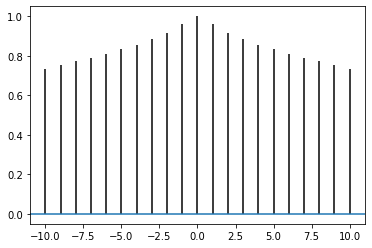

In [91]:
plt.acorr(df_merged_kpx_per_hour['Power Generation(kW)'])
#plt.xlim(-20, 20)

#### 발전량 moving average

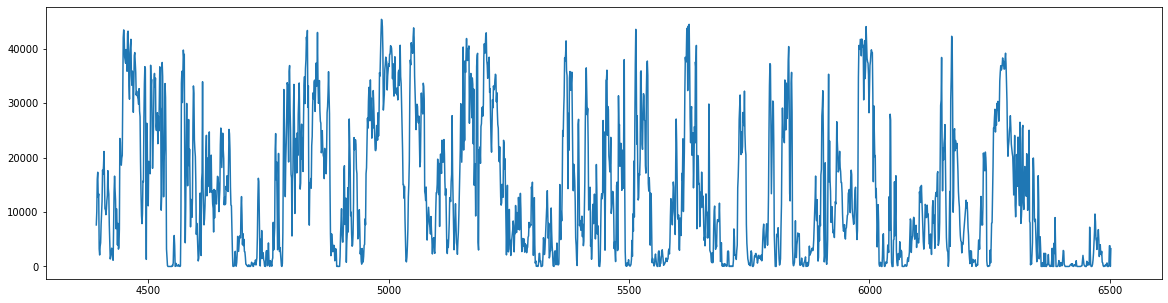

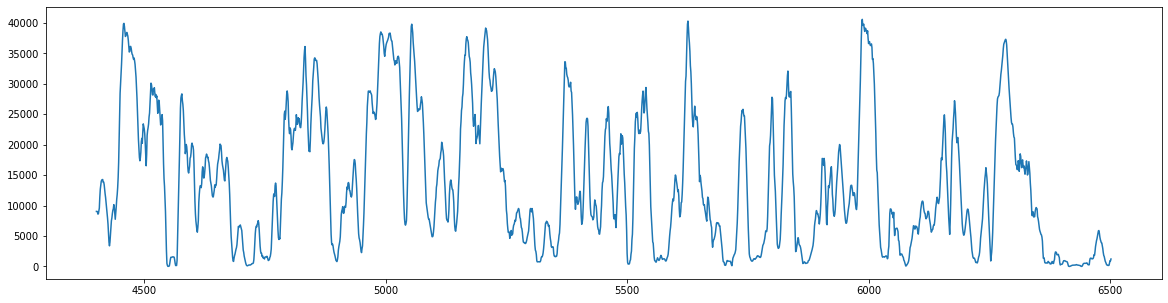

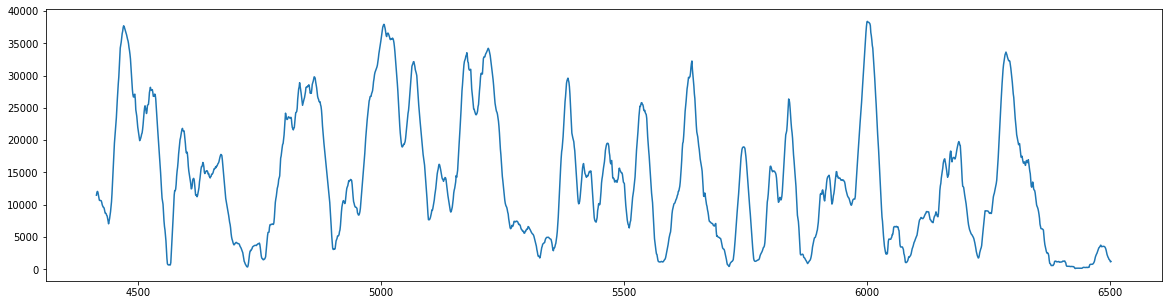

In [92]:
m1 = df_merged_kpx_per_hour['datetime'] > '2018-01-01'
m2 = df_merged_kpx_per_hour['datetime'] < '2018-03-30'
df_target = df_merged_kpx_per_hour[np.logical_and.reduce([m1, m2])]
plt.figure(figsize=(20, 5))
plt.plot(df_target['Power Generation(kW)'])
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(df_target['Power Generation(kW)'].rolling(10).mean())
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(df_target['Power Generation(kW)'].rolling(24).mean())
plt.show()

# show normalized mutual information

[Normalized Mutual Information : Descending Order]
dayofyear             day                     0.762499
                      Power Generation(kW)    0.690238
Power Generation(kW)  Celsius(°C)             0.669726
dayofyear             month                   0.648973
Power Generation(kW)  Humidity(%)             0.539756
dtype: float64


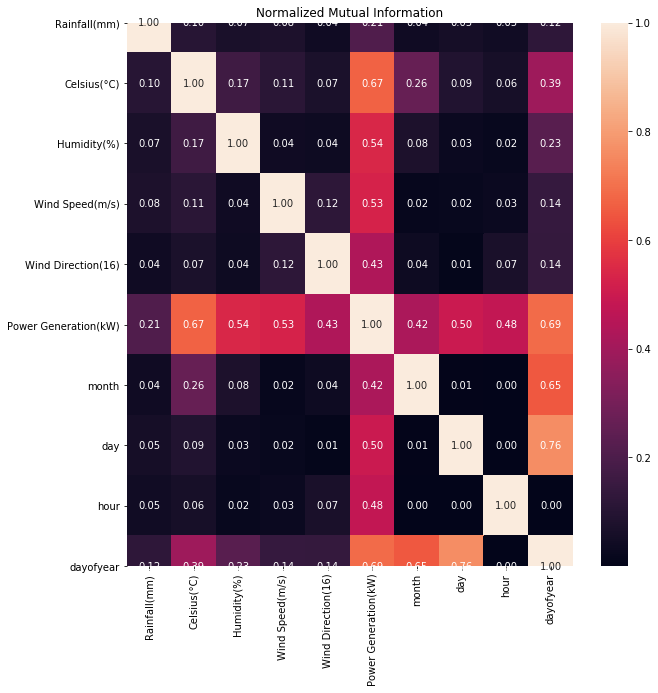

In [25]:
show_normalized_mutual_information(df_merged_kpx_per_hour_2)

# distribution plot

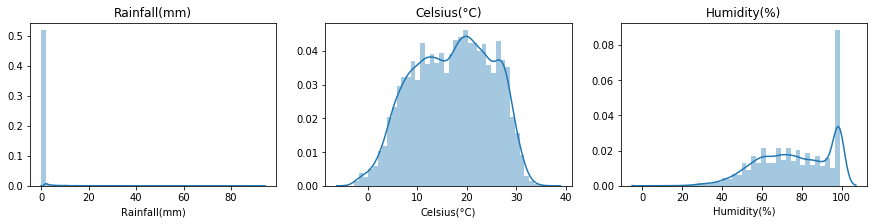

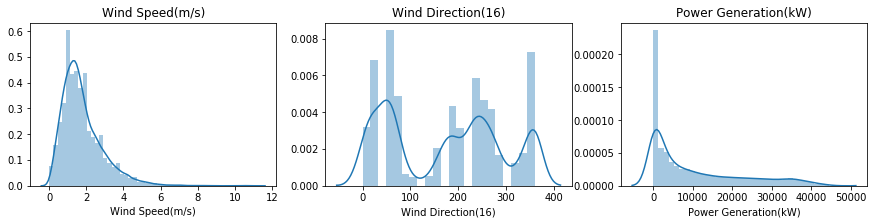

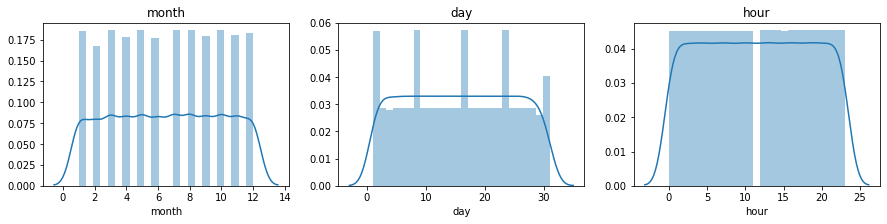

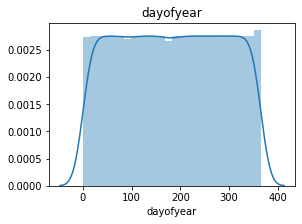

In [27]:
## Distribution plot of each column
for idx, column in enumerate(df_merged_kpx_per_hour_2.columns) :
    if idx%3 == 0:
        plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, (idx%3)+1)
    plt.title(column)
    try : 
        sns.distplot(df_merged_kpx_per_hour_2[column].interpolate(method='linear')) # due to few NA existing
    except Exception as e :
        print(e)
    if idx%3 == 2 :
        plt.show()

## Power Generation versus each column (Scatterplot)

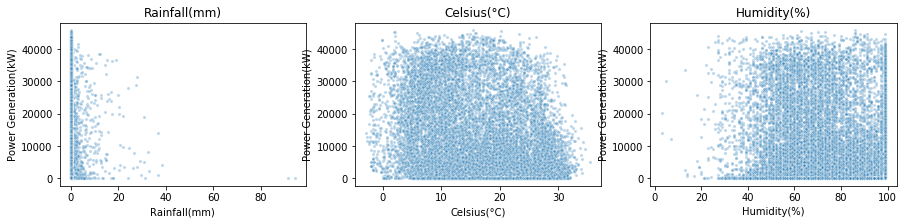

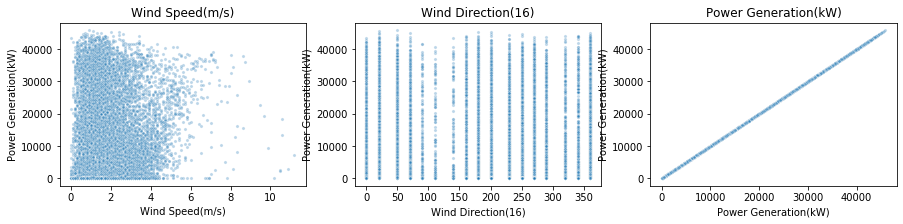

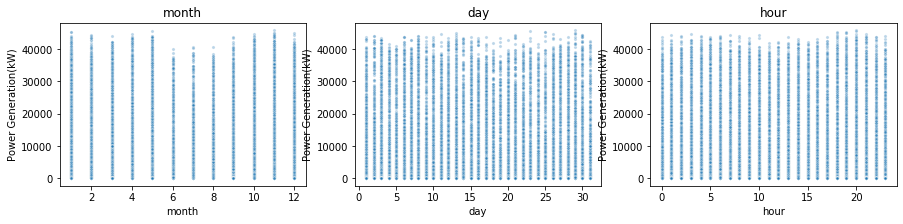

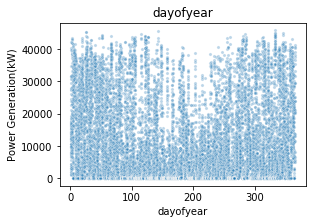

In [29]:
for idx, column in enumerate(df_merged_kpx_per_hour_2.columns) :
    if idx%3 == 0:
        plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, (idx%3)+1)
    plt.title(column)
    sns.scatterplot(df_merged_kpx_per_hour_2[column].interpolate(method='linear'), df_merged_kpx_per_hour_2['Power Generation(kW)'], s=10, alpha=0.3)
    if idx%3 == 2 :
        plt.show()

## Wind Speed versus each column (Scatterplot)

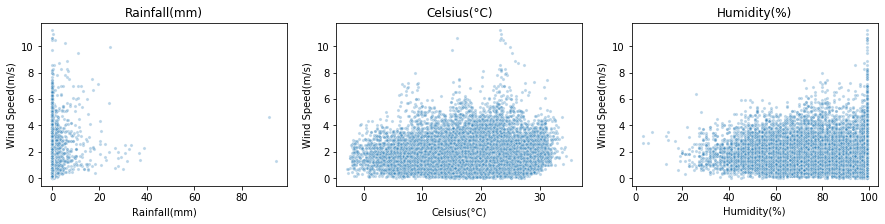

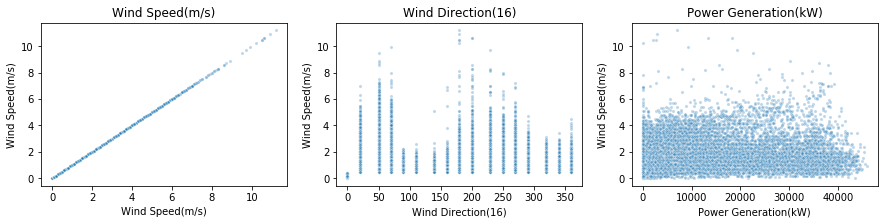

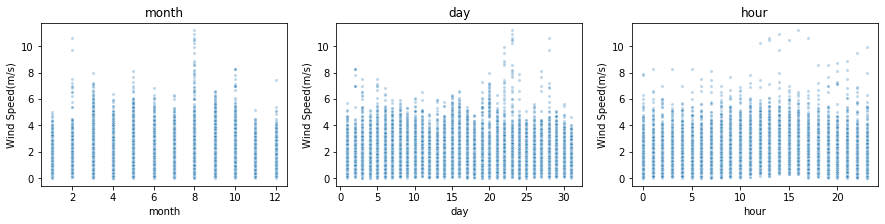

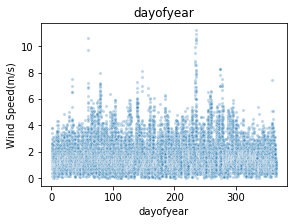

In [30]:
for idx, column in enumerate(df_merged_kpx_per_hour_2.columns) :
    if idx%3 == 0:
        plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, (idx%3)+1)
    plt.title(column)
    sns.scatterplot(df_merged_kpx_per_hour_2[column].interpolate(method='linear'), df_merged_kpx_per_hour_2['Wind Speed(m/s)'], s=10, alpha=0.3)
    if idx%3 == 2 :
        plt.show()

## Power Generation versus each column (Relative Density Plot)

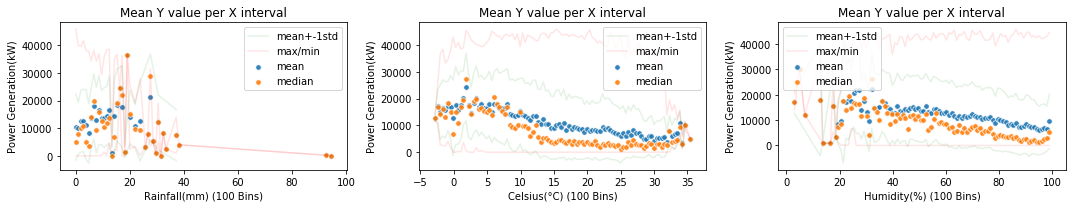

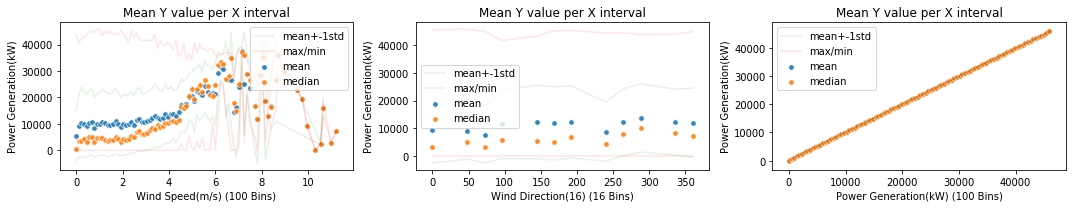

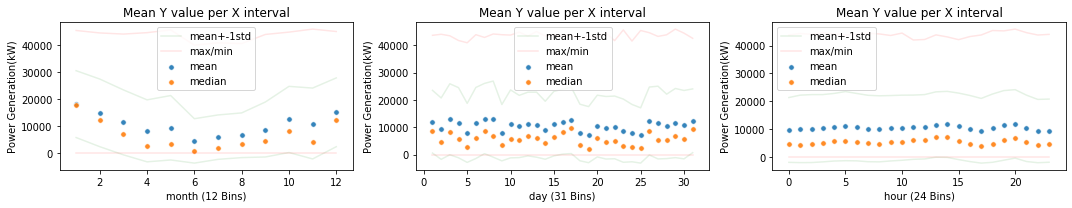

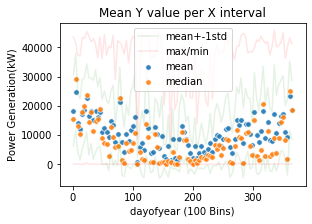

In [31]:
target = 'Power Generation(kW)'
show_relative_density_plot(df_merged_kpx_per_hour_2, target)

# Add Feature engineering

In [78]:
import math

def wind_cos_sin(df):
    wind_dir = df['Wind Direction(16)']
    wind_dir_deg = np.deg2rad(wind_dir)

    wind_dir_cos = wind_dir_deg.apply(math.cos)
    wind_dir_sin = wind_dir_deg.apply(math.sin)

    df['wind_dir_cos'] = wind_dir_cos
    df['wind_dir_sin'] = wind_dir_sin
    
    return df

def new_wind_speed_direction(df,phi):
    theta = df['Wind Direction(16)']
    wind_speed = df['Wind Speed(m/s)']
    deg = theta - phi

    cos_deg = np.deg2rad(deg).apply(math.cos)

    new_wind_speed = wind_speed*cos_deg

    df['new_wind_speed'] = new_wind_speed
    
    return df

In [79]:
columns = ['Wind Direction(16)','Wind Speed(m/s)','Celsius(°C)','Rainfall(mm)','Humidity(%)','Snowfall(cm)','Cloud','new_wind_speed','wind_dir_cos','wind_dir_sin']

def fe_add_previous_n_hours_mean(df_original, how_long, columns) :
    df = df_original.copy()

    for column in columns :
        df[column+'(%d hours mean)'%how_long] = 0
        for idx in range(how_long) :
           #print(idx)
            df[column+'(%d hours mean)'%how_long] += df[column].shift(idx+1)
        df[column+'(%d hours mean)'%how_long] /= how_long


    df = df[how_long:]
    
    df['Wind Direction(16)'+'(%d hours mean)'%how_long] = df['Wind Direction(16)'+'(%d hours mean)'%how_long].astype(float).round()
    df['Celsius(°C)'+'(%d hours mean)'%how_long] = df['Celsius(°C)'+'(%d hours mean)'%how_long].astype(float).round(1)
    df['Rainfall(mm)'+'(%d hours mean)'%how_long] = df['Rainfall(mm)'+'(%d hours mean)'%how_long].astype(float).round(1)
    df['Wind Speed(m/s)'+'(%d hours mean)'%how_long] = df['Wind Speed(m/s)'+'(%d hours mean)'%how_long].astype(float).round(1)
    df['Humidity(%)'+'(%d hours mean)'%how_long] = df['Humidity(%)'+'(%d hours mean)'%how_long].astype(float).round()
    #df['Snowfall(cm)'+'(%d hours mean)'%how_long] = df['Snowfall(cm)'+'(%d hours mean)'%how_long].astype(float).round()
    df['Cloud'+'(%d hours mean)'%how_long] = df['Cloud'+'(%d hours mean)'%how_long].astype(float).round()
    return df

#### 8시간 평균 낸 것에 대해 풍속 인코딩

In [80]:
df_merged_kpx_per_hour = wind_cos_sin(df_merged_kpx_per_hour)
df_merged_kpx_per_hour = new_wind_speed_direction(df_merged_kpx_per_hour, 340)

In [81]:
df_per_8hour_kpx_pre_mean = fe_add_previous_n_hours_mean(df_merged_kpx_per_hour, 8, columns)

In [82]:
#add cos, sin wind_direction 
#우선 시간별로 인코딩을 함
df_per_8hour_kpx_2 = wind_cos_sin(df_per_8hour_kpx_pre_mean)
df_per_8hour_kpx_2['Wind Direction(16)(8 hours mean)'].value_counts()
df_per_8hour_kpx_2 = new_wind_speed_direction(df_per_8hour_kpx_2,50)

#8시간 간격으로 평균
df_per_8hour_kpx = fe_add_previous_n_hours_mean(df_per_8hour_kpx_2,8,columns)
df_per_8hour_kpx = df_per_8hour_kpx.reset_index()
df_per_8hour_kpx = df_per_8hour_kpx.drop(['index'],axis=1)

In [83]:
df_per_8hour_kpx_show = df_per_8hour_kpx.drop(['datetime','date','Solar Radiation(MJ/m^2)'],axis=1)

[Normalized Mutual Information : Descending Order]
wind_dir_sin                  Wind Direction(16)            1.000000
wind_dir_cos                  Wind Direction(16)            0.965216
wind_dir_sin                  wind_dir_cos                  0.965216
new_wind_speed(8 hours mean)  Power Generation(kW)          0.927816
wind_dir_sin(8 hours mean)    wind_dir_cos(8 hours mean)    0.904717
dtype: float64


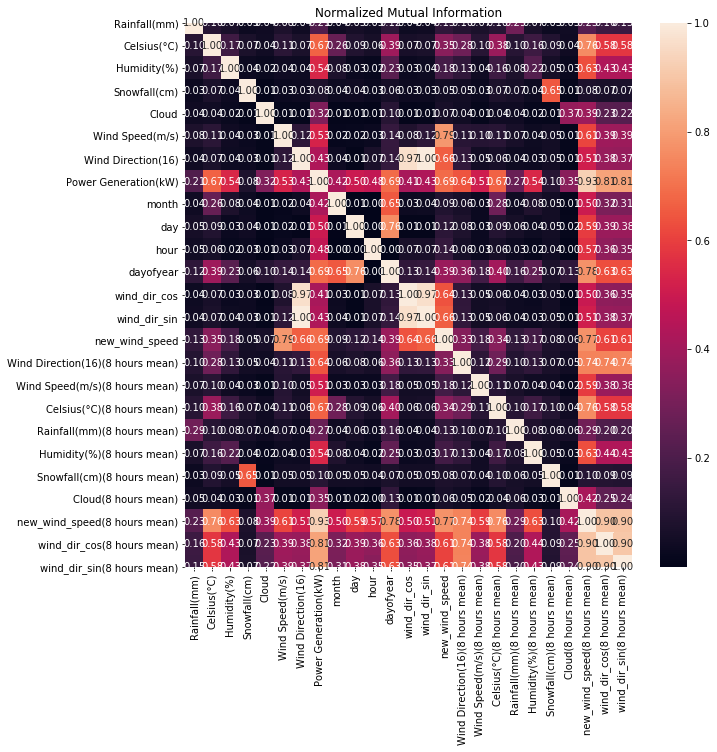

In [84]:
show_normalized_mutual_information(df_per_8hour_kpx_show)

#### 풍속 인코딩한 것을 8시간 간격으로 평균

In [85]:
#add cos, sin wind_direction 
#우선 시간별로 인코딩을 함
df_per_8hour_kpx_2 = wind_cos_sin(df_merged_kpx_per_hour)
df_per_8hour_kpx_2['Wind Direction(16)'].value_counts()
df_per_8hour_kpx_2 = new_wind_speed_direction(df_per_8hour_kpx_2,50)

#8시간 간격으로 평균
df_per_8hour_kpx = fe_add_previous_n_hours_mean(df_per_8hour_kpx_2,8,columns)
df_per_8hour_kpx = df_per_8hour_kpx.reset_index()
df_per_8hour_kpx = df_per_8hour_kpx.drop(['index'],axis=1)

drop_col = ['datetime','date','Celsius(°C)', 'Rainfall(mm)', 'Wind Speed(m/s)']

df_per_8hour_kpx_2 = df_per_8hour_kpx.drop(drop_col,axis=1)

df_per_8hour_kpx_2.columns

Index(['Humidity(%)', 'Solar Radiation(MJ/m^2)', 'Snowfall(cm)', 'Cloud',
       'Wind Direction(16)', 'Power Generation(kW)', 'month', 'day', 'hour',
       'dayofyear', 'wind_dir_cos', 'wind_dir_sin', 'new_wind_speed',
       'Wind Direction(16)(8 hours mean)', 'Wind Speed(m/s)(8 hours mean)',
       'Celsius(°C)(8 hours mean)', 'Rainfall(mm)(8 hours mean)',
       'Humidity(%)(8 hours mean)', 'Snowfall(cm)(8 hours mean)',
       'Cloud(8 hours mean)', 'new_wind_speed(8 hours mean)',
       'wind_dir_cos(8 hours mean)', 'wind_dir_sin(8 hours mean)'],
      dtype='object')

[Normalized Mutual Information : Descending Order]
month                    Solar Radiation(MJ/m^2)    1.875000
Solar Radiation(MJ/m^2)  Humidity(%)                1.554688
Cloud                    Solar Radiation(MJ/m^2)    1.125000
wind_dir_sin             Wind Direction(16)         1.000000
wind_dir_cos             Wind Direction(16)         0.965231
dtype: float64


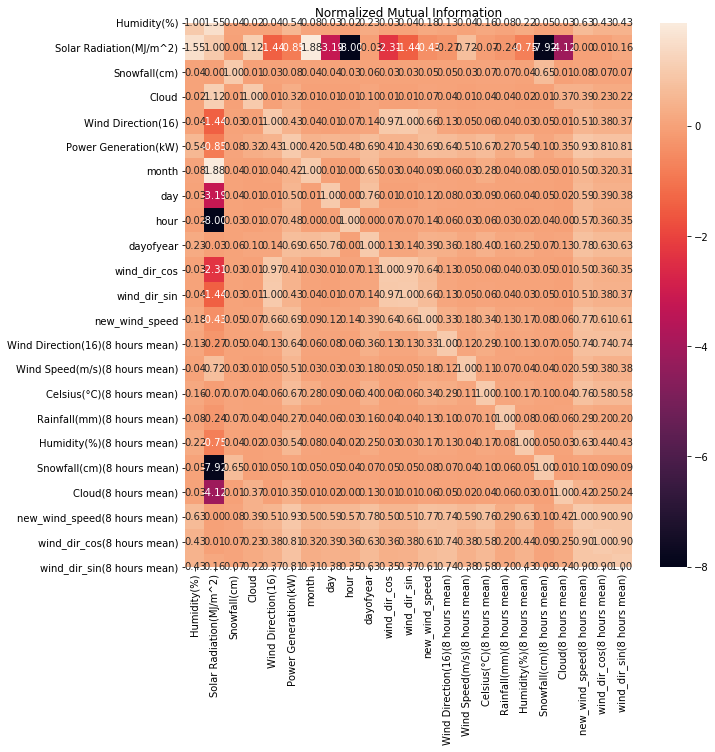

In [88]:
show_normalized_mutual_information(df_per_8hour_kpx_2)

/home/jeon/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jeon/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


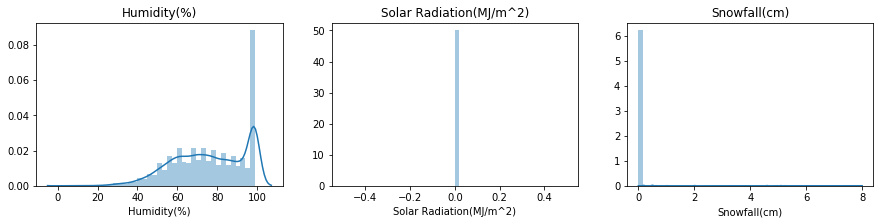

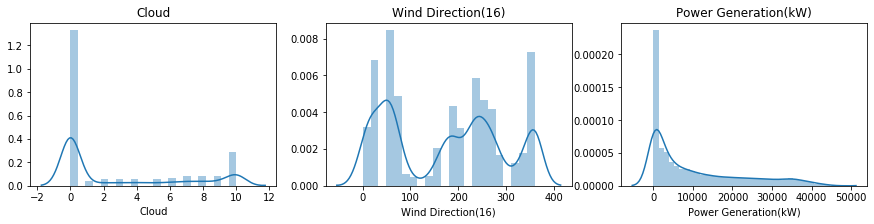

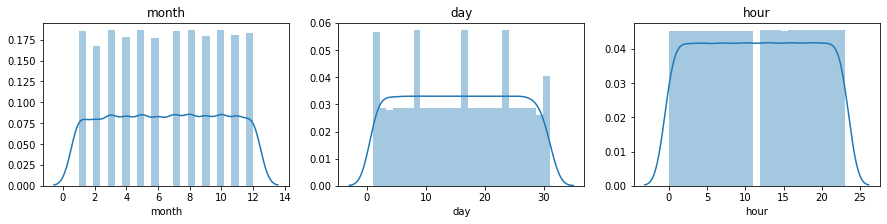

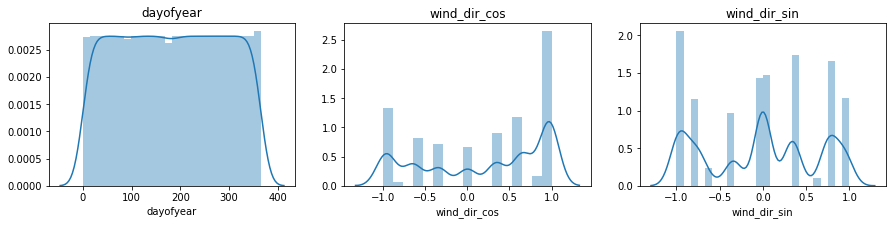

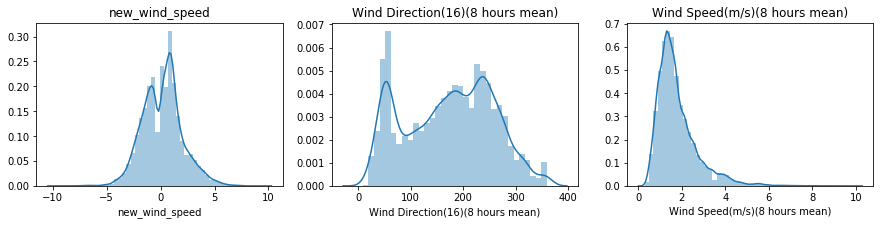

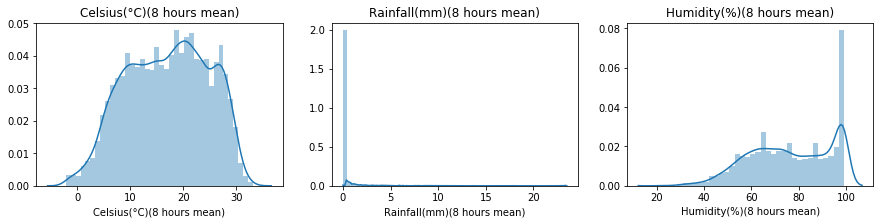

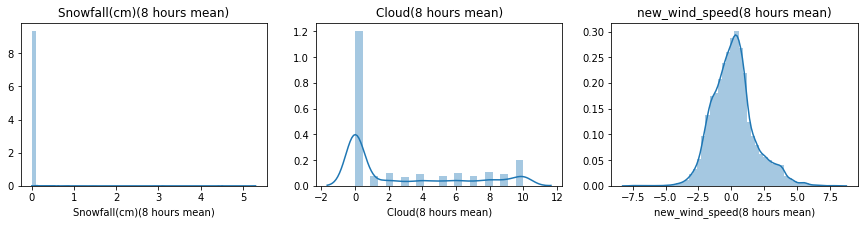

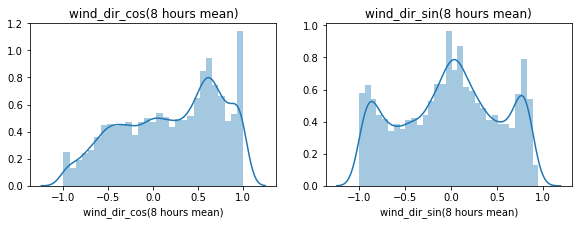

In [89]:
## Distribution plot of each column
for idx, column in enumerate(df_per_8hour_kpx_2.columns) :
    if idx%3 == 0:
        plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, (idx%3)+1)
    plt.title(column)
    try : 
        sns.distplot(df_per_8hour_kpx_2[column].interpolate(method='linear')) # due to few NA existing
    except Exception as e :
        print(e)
    if idx%3 == 2 :
        plt.show()

#### Power Generation versus each column (Relative Density Plot)

In [ ]:
df_per_8hour_kpx_2 = df_per_8hour_kpx_2.drop(['date'],axis=1)

In [ ]:
target = 'Power Generation(kW)'
show_relative_density_plot(df_per_8hour_kpx_2, target)

# 3시간 단위로 묶기 (kpx)

In [ ]:
df_merged_kpx_per_hour = merge_obs_power_kpx(df_observation, df_power)

In [ ]:
#add cos, sin wind_direction 
#우선 시간별로 인코딩을 함
df_per_3hour_kpx_2 = wind_cos_sin(df_merged_kpx_per_hour)
df_per_3hour_kpx_2['Wind Direction(16)'].value_counts()
df_per_3hour_kpx_2 = new_wind_speed_direction(df_per_3hour_kpx_2,50)

#3시간 간격으로 평균
df_per_3hour_kpx = fe_add_previous_n_hours_mean(df_per_3hour_kpx_2,3,columns)
df_per_3hour_kpx = df_per_3hour_kpx.reset_index()
df_per_3hour_kpx = df_per_3hour_kpx.drop(['index'],axis=1)

drop_col = ['datetime','date','Celsius(°C)', 'Rainfall(mm)', 'Wind Speed(m/s)']

df_per_3hour_kpx_2 = df_per_3hour_kpx.drop(drop_col,axis=1)

df_per_3hour_kpx_2.columns

In [ ]:
show_normalized_mutual_information(df_per_3hour_kpx_2)

In [ ]:
## Distribution plot of each column
for idx, column in enumerate(df_per_3hour_kpx_2.columns) :
    if idx%3 == 0:
        plt.figure(figsize=(15, 3))
    plt.subplot(1, 3, (idx%3)+1)
    plt.title(column)
    try : 
        sns.distplot(df_per_3hour_kpx_2[column].interpolate(method='linear')) # due to few NA existing
    except Exception as e :
        print(e)
    if idx%3 == 2 :
        plt.show()

In [ ]:
target = 'Power Generation(kW)'
show_relative_density_plot(df_per_3hour_kpx_2, target)